## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv("QueryResults.csv")

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
print(df.head())
df.tail()

               m   TagName  Count
0  7/1/2008 0:00        c#      3
1  8/1/2008 0:00  assembly      7
2  8/1/2008 0:00         c     78
3  8/1/2008 0:00        c#    492
4  8/1/2008 0:00       c++    157


,m,TagName,Count
2713,11/1/2024 0:00,php,543
2714,11/1/2024 0:00,python,3189
2715,11/1/2024 0:00,r,703
2716,11/1/2024 0:00,ruby,75
2717,11/1/2024 0:00,swift,398


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [ ]:
df.shape

(2718, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.shape[0]

2718

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby("TagName").sum(numeric_only=True)

,Count
TagName,
assembly,43334
c,393388
c#,1583574
c++,789999
delphi,50852
go,72594
java,1872549
javascript,2461143
perl,66957


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [ ]:
grouped_df = df.groupby("TagName").count()

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
df["m"] = pd.to_datetime(df["m"])
df

,m,TagName,Count
0,2008-07-01,c#,3
1,2008-08-01,assembly,7
2,2008-08-01,c,78
3,2008-08-01,c#,492
4,2008-08-01,c++,157
...,...,...,...
2713,2024-11-01,php,543
2714,2024-11-01,python,3189
2715,2024-11-01,r,703
2716,2024-11-01,ruby,75


## Data Manipulation



**Challenge**: you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df.

In [ ]:
pivoted_df = df.pivot(index="m", columns="TagName", values="Count")
pivoted_df

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,7.0,78.0,492.0,157.0,11.0,NaN,214.0,158.0,26.0,154.0,116.0,NaN,66.0,NaN
2008-09-01,26.0,292.0,1525.0,699.0,93.0,NaN,1032.0,579.0,120.0,411.0,507.0,3.0,274.0,NaN
2008-10-01,15.0,267.0,1816.0,743.0,101.0,NaN,1053.0,661.0,109.0,513.0,480.0,NaN,234.0,NaN
2008-11-01,13.0,221.0,1510.0,658.0,129.0,NaN,856.0,488.0,79.0,417.0,417.0,1.0,143.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,90.0,555.0,2073.0,1112.0,52.0,249.0,1524.0,2857.0,34.0,859.0,5195.0,1051.0,93.0,568.0
2024-08-01,112.0,479.0,1815.0,1011.0,83.0,208.0,1194.0,2448.0,37.0,786.0,4458.0,877.0,103.0,537.0
2024-09-01,86.0,444.0,1557.0,980.0,67.0,153.0,1269.0,2158.0,26.0,601.0,3681.0,744.0,82.0,504.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
pivoted_df.shape

(197, 14)

In [ ]:
pivoted_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')

In [ ]:
pivoted_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,7.0,78.0,492.0,157.0,11.0,NaN,214.0,158.0,26.0,154.0,116.0,NaN,66.0,NaN
2008-09-01,26.0,292.0,1525.0,699.0,93.0,NaN,1032.0,579.0,120.0,411.0,507.0,3.0,274.0,NaN
2008-10-01,15.0,267.0,1816.0,743.0,101.0,NaN,1053.0,661.0,109.0,513.0,480.0,NaN,234.0,NaN
2008-11-01,13.0,221.0,1510.0,658.0,129.0,NaN,856.0,488.0,79.0,417.0,417.0,1.0,143.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [ ]:
pivoted_df.count()

,0
TagName,
assembly,196
c,196
c#,197
c++,196
delphi,196
go,181
java,196
javascript,196
perl,196


In [ ]:
pivoted_df.isna().values.any()

True

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

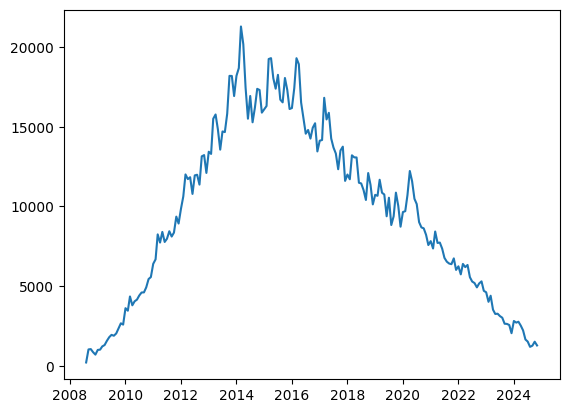

In [ ]:
plot = plt.plot(pivoted_df.index ,pivoted_df["java"])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

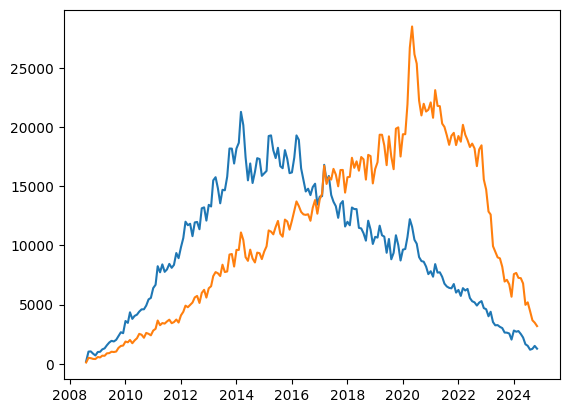

In [ ]:
plt.plot(pivoted_df.index ,pivoted_df["java"], pivoted_df.index ,pivoted_df["python"])

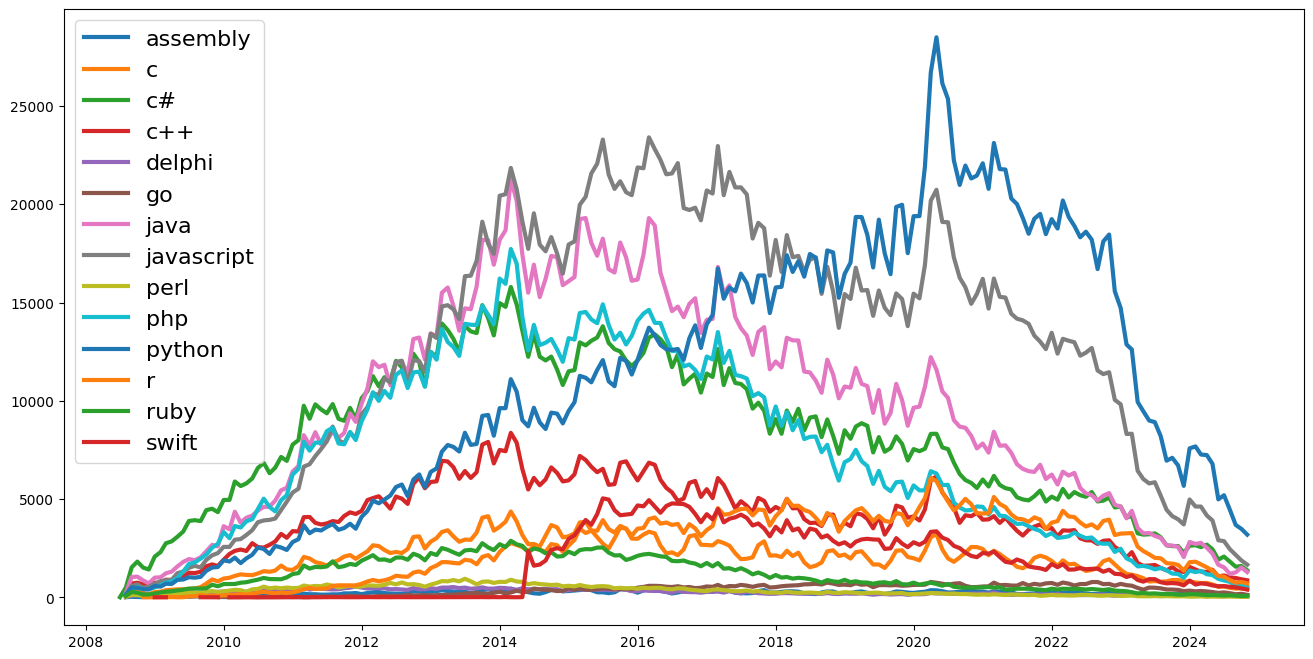

In [ ]:
plt.figure(figsize=(16,8))

for column in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[column], linewidth=3, label=column)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).